# Imports

In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.options.display.max_columns = 999
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Cargar los csvs como pandas dataframes

In [3]:
robados = pd.read_csv('./curados/para_EDA.csv', parse_dates= ['tramite_fecha', 'fecha_inscripcion_inicial'])
robados.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_modelo_descripcion,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad
0,DENUNCIA DE ROBO O HURTO,2018-01-17,2000-10-05,ESTEBAN ECHEVERRIA Nº 1,Buenos Aires,Nacional,2000.0,SEDAN 4 P,CHEVROLET,CORSA,Privado,Física,MONTE GRANDE,BUENOS AIRES,Masculino,1981.0,ARGENTINA,100
1,DENUNCIA DE ROBO O HURTO,2018-01-03,2007-11-22,LANUS Nº 1,Buenos Aires,Nacional,2007.0,FURGON,PEUGEOT,PARTNER,Privado,Física,VALENTIN ALSINA,BUENOS AIRES,Femenino,1990.0,ARGENTINA,100
2,DENUNCIA DE ROBO O HURTO,2018-01-12,1995-02-01,MAR DEL PLATA Nº 02,Buenos Aires,Nacional,1995.0,SEDAN 4 P,RENAULT,RENAULT 19,Privado,Física,UNIDAD TURISTICA CHAPADMALAL,BUENOS AIRES,Masculino,1986.0,ARGENTINA,100
3,DENUNCIA DE ROBO O HURTO,2018-01-02,1999-09-28,NECOCHEA Nº 1,Buenos Aires,Nacional,1999.0,SEDAN 3 P,RENAULT,CLIO,Privado,Física,NECOCHEA BS.AS.,BUENOS AIRES,No identificado,1964.0,NO IDENTIFICADO,100
4,DENUNCIA DE ROBO O HURTO,2018-01-09,2006-09-07,PILAR Nº 1,Buenos Aires,Nacional,2006.0,FURGON,PEUGEOT,PARTNER,Privado,Física,PTE. DERQUI,BUENOS AIRES,Femenino,1961.0,ARGENTINA,100


In [4]:
robados.dtypes

tramite_tipo                              object
tramite_fecha                     datetime64[ns]
fecha_inscripcion_inicial         datetime64[ns]
registro_seccional_descripcion            object
registro_seccional_provincia              object
automotor_origen                          object
automotor_anio_modelo                    float64
automotor_tipo_descripcion                object
automotor_marca_descripcion               object
automotor_modelo_descripcion              object
automotor_uso_descripcion                 object
titular_tipo_persona                      object
titular_domicilio_localidad               object
titular_domicilio_provincia               object
titular_genero                            object
titular_anio_nacimiento                  float64
titular_pais_nacimiento                   object
titular_porcentaje_titularidad             int64
dtype: object

# Limpieza del dataframe

La idea de esta parte del EDA es sacarnos de encima los NaNs y las columnas que no vamos a usar para nada.

In [5]:
# Porcentaje de NaNs por columna
robados.isnull().sum()/np.shape(robados)[0]*100

tramite_tipo                      0.0
tramite_fecha                     0.0
fecha_inscripcion_inicial         0.0
registro_seccional_descripcion    0.0
registro_seccional_provincia      0.0
automotor_origen                  0.0
automotor_anio_modelo             0.0
automotor_tipo_descripcion        0.0
automotor_marca_descripcion       0.0
automotor_modelo_descripcion      0.0
automotor_uso_descripcion         0.0
titular_tipo_persona              0.0
titular_domicilio_localidad       0.0
titular_domicilio_provincia       0.0
titular_genero                    0.0
titular_anio_nacimiento           0.0
titular_pais_nacimiento           0.0
titular_porcentaje_titularidad    0.0
dtype: float64

Las columnas que mas NaNs tienen son los códigos de tipo, marca, modelo y uso y el país de nacimiento del titular. Primero vamos a tirar todas las columnas que codifican y nos vamos a quedar sólo con las descripciones.

In [6]:
cols2drop = ['automotor_tipo_codigo', 'automotor_marca_codigo', 'automotor_modelo_codigo', 
             'automotor_uso_codigo']
robados = robados.drop(cols2drop, axis=1)
robados.head()

KeyError: "['automotor_tipo_codigo' 'automotor_marca_codigo'\n 'automotor_modelo_codigo' 'automotor_uso_codigo'] not found in axis"

Y ahora vamos a dropear el resto de los NaNs.

In [7]:
# Tiramos los NaNs
robados_ncol_old = np.shape(robados)[0]
robados = robados.dropna()
robados_ncol_new = np.shape(robados)[0]

In [8]:
print('Nos quedamos con %2d trámites de los %2d trámites originales' %(robados_ncol_new, robados_ncol_old))
print('Es decir, tiramos el %.2f%% de los casos' %((robados_ncol_old-robados_ncol_new)/robados_ncol_old*100))

Nos quedamos con 60670 trámites de los 60670 trámites originales
Es decir, tiramos el 0.00% de los casos


Chequeamos que no quede ningún NaN

In [9]:
# Porcentaje de NaNs por columna
robados.isnull().sum()/np.shape(robados)[0]*100

tramite_tipo                      0.0
tramite_fecha                     0.0
fecha_inscripcion_inicial         0.0
registro_seccional_descripcion    0.0
registro_seccional_provincia      0.0
automotor_origen                  0.0
automotor_anio_modelo             0.0
automotor_tipo_descripcion        0.0
automotor_marca_descripcion       0.0
automotor_modelo_descripcion      0.0
automotor_uso_descripcion         0.0
titular_tipo_persona              0.0
titular_domicilio_localidad       0.0
titular_domicilio_provincia       0.0
titular_genero                    0.0
titular_anio_nacimiento           0.0
titular_pais_nacimiento           0.0
titular_porcentaje_titularidad    0.0
dtype: float64

Listo, no hay más NaNs en el dataframe.

## EDA

### Robos por año

In [10]:
# Creo una nueva columna en la que esté codificado el día de la de semana
robados["anio"] = robados["tramite_fecha"].dt.year

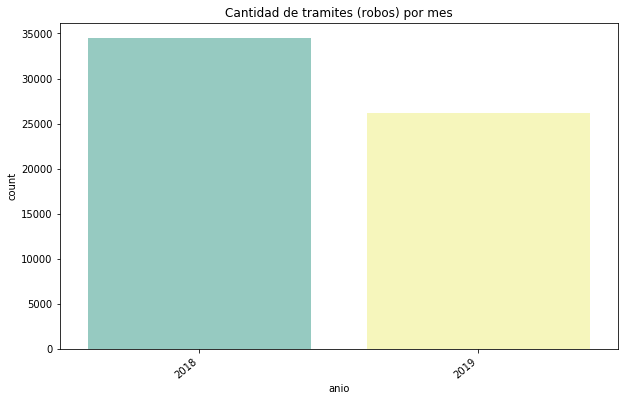

In [11]:
#dia_semana_pivot = pd.pivot_table(robados, values = 'tramite_tipo', columns = 'dia_semana',fill_value=0, aggfunc = 'count')
plt.figure(figsize=(10,6))
ax = sns.countplot(x="anio", data=robados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de tramites (robos) por mes")
plt.show()

### Robos por mes del año

In [12]:
# Creo una nueva columna en la que esté codificado el día de la de semana
robados["mes_idx"] = robados["tramite_fecha"].dt.month

In [13]:
# Armo una función que codifique los días de la semana 
def label_month(month_code):
    if (month_code==1):
        return "Enero"
    elif (month_code==2):
        return "Febrero"
    elif (month_code==3):
        return "Marzo"
    elif (month_code==4):
        return "Abril"
    elif (month_code==5):
        return "Mayo"
    elif (month_code==6):
        return "Junio"
    elif (month_code==7):
        return "Julio"
    elif (month_code==8):
        return "Agosto"
    elif (month_code==9):
        return "Septiembre"
    elif (month_code==10):
        return "Octubre"
    elif (month_code==11):
        return "Noviembre"
    elif (month_code==12):
        return "Diciembre"

In [14]:
# Aplico la funcion a una nueva columna "dia_semana"
robados["mes"] = robados["mes_idx"].apply(lambda x: label_month(x))

In [15]:
robados["mes_anio"] = robados["mes"].astype(str).str.cat(robados["anio"].astype(str), sep =" ") 

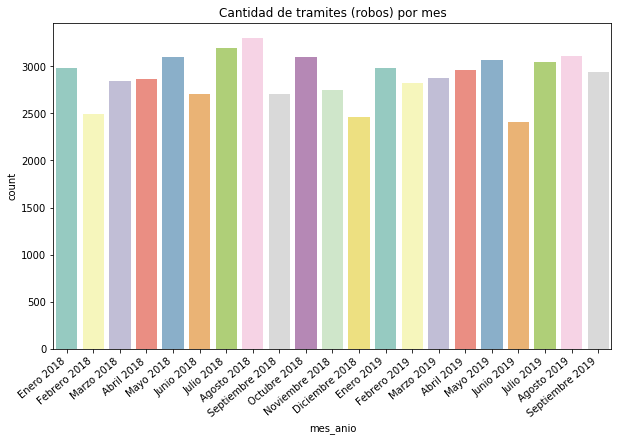

In [16]:
# Ploteamos en un countplot la cantidad de tramites por mes
plt.figure(figsize=(10,6))
ax = sns.countplot(x="mes_anio", data=robados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de tramites (robos) por mes")
plt.show()

Ahora lo que podemos hacer es combinar los meses pero dividir por dos los que aparecen dos veces.

In [17]:
# Armamos un pivot con la cantidad de tramites por mes
mes_pivot = pd.pivot_table(robados, values = 'tramite_tipo', columns = 'mes',fill_value=0, aggfunc = 'count')

In [18]:
# OReordenamos los meses
cols = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", 
        "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
mes_pivot = mes_pivot[cols]
# Dividimos por dos los meses que aparecen dos veces
mes_pivot[cols[0:9]] = mes_pivot[cols[0:9]]/2

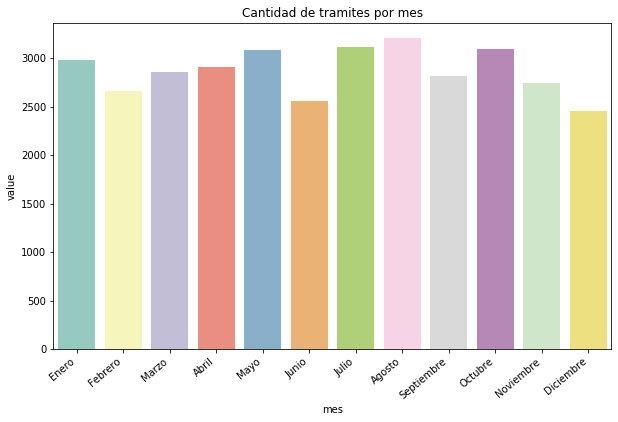

In [19]:
# Convertimos el pivot de mes a formato long para poder plotear con sns
long_mes_pivot = pd.melt(mes_pivot)

# Ploteamos un barplot con la cantidad de tramites por mes
plt.figure(figsize=(10,6))
ax = sns.barplot(y = "value", x = "mes", data = long_mes_pivot,
            palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de tramites por mes")
plt.show()

### Robos por día de la semana

In [20]:
# Creo una nueva columna en la que esté codificado el día de la de semana
robados["dia_semana_idx"] = robados["tramite_fecha"].dt.dayofweek

In [21]:
# Armo una función que codifique los días de la semana 
def label_weekday(day_code):
    if (day_code==0):
        return "Lunes"
    elif (day_code==1):
        return "Martes"
    elif (day_code==2):
        return "Miercoles"
    elif (day_code==3):
        return "Jueves"
    elif (day_code==4):
        return "Viernes"
    elif (day_code==5):
        return "Sabado"
    elif (day_code==6):
        return "Domingo"

In [22]:
# Aplico la funcion a una nueva columna "dia_semana"
robados["dia_semana"] = robados["dia_semana_idx"].apply(lambda x: label_weekday(x))

Ahora creamos una tabla pivote para resumir la cantidad de robos por dia de la semana.

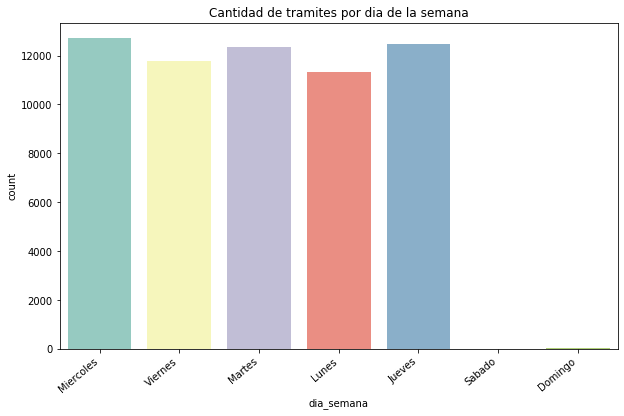

In [23]:
#dia_semana_pivot = pd.pivot_table(robados, values = 'tramite_tipo', columns = 'dia_semana',fill_value=0, aggfunc = 'count')
plt.figure(figsize=(10,6))
ax = sns.countplot(x="dia_semana", data=robados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de tramites por dia de la semana")
plt.show()

### Robos por marca

In [24]:
# Arreglo las marcas que están mal codificadas
robados["automotor_marca_descripcion"].unique()

array(['CHEVROLET', 'PEUGEOT', 'RENAULT', 'FORD', 'CITROEN', 'VOLKSWAGEN',
       'MERCEDES BENZ', 'HONDA', 'NISSAN', 'FIAT', 'SUZUKI', 'TOYOTA',
       'JEEP', 'ALFA ROMEO', 'AUDI', 'BMW', 'CHRYSLER', 'DODGE', 'MINI',
       'LAND ROVER', 'CHERY', 'SEAT', 'GALLOPER', 'KIA', 'HYUNDAI',
       'IVECO', 'SSANGYONG', 'SMART', 'MITSUBISHI', 'DAIHATSU',
       'TRENQUEMOLQUE', 'LIFAN', 'OPEL', 'SCANIA', 'MAZDA',
       'DEUTZ AGRALE', 'DS', 'RANDON', 'PORSCHE', 'SUBARU', 'LEXUS',
       'RIMEK', 'PINCEN', 'COMAR', 'DAEWOO', 'RASTROJERO DIESEL',
       'HERMANN', 'CORMETAL', 'PRATI-FRUEHAUF'], dtype=object)

In [25]:
# VOLKSWAGEN
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSWAGEN (136)'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '136-VOLKSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSWGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKKSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOKSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'WOLKSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VLKSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '-136-VOLKSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VW SENDA NAFTA'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSWAGEN/MARCOPOLO'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSWAGN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSWAGEN (034)'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSWGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLKSWGAEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOKKSWAGEN'] = 'VOLKSWAGEN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'VOLSKWAGEN'] = 'VOLKSWAGEN'
# RENAULT
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENAULT 21'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENAUTL'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENEULT'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENAUTL'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENAULT (033)'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENULT'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENAUL'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'REANULT'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENUALT'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '-112-RENAULT'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'RENAULT 9 RN'] = 'RENAULT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '-112- RENAULT'] = 'RENAULT'
# MERCEDES BENZ
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'M. BENZ'] = 'MERCEDES BENZ'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'MERCEDEZ BENZ'] = 'MERCEDES BENZ'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'MERCEDES-BENZ'] = 'MERCEDES BENZ'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'MECEDES BENZ'] = 'MERCEDES BENZ'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'M.BENZ'] = 'MERCEDES BENZ'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'MERSEDES BENZ'] = 'MERCEDES BENZ'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'MERCEDES  BENZ'] = 'MERCEDES BENZ'
# SUZUKI
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'SUZUKI SWIFT SEDAN NLX'] = 'SUZUKI'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'ZUZUKI'] = 'SUZUKI'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'SUZUKI SWIFT GTI'] = 'SUZUKI'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'SUZUKI SWIFT  SEDAN NLX'] = 'SUZUKI'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'SUZUKI CARRY'] = 'SUZUKI'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'SUZUKI SWIFT SEDAN GLX'] = 'SUZUKI'
# GMC
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'GMC CHEVETTE'] = 'GMC'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'GMC  CHEVETTE'] = 'GMC'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'GMC  CHEVROLET'] = 'GMC'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'GMC CHEVROLET'] = 'GMC'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'GMC   CHEVETTE'] = 'GMC'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'GMC CHEVETTE (GENERAL MOTORS CORPORATION)'] = 'GMC'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'GENERAL MOTORS'] = 'GMC'
# JEEP
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'JEEP GLADIATOR 500'] = 'JEEP'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'JEEP ESTANCIERA'] = 'JEEP'
# PEUGEOT
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'PEUGEOT (039)'] = 'PEUGEOT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '.PEUGEOT'] = 'PEUGEOT'
# NISSAN
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'NISSAN (102)'] = 'NISSAN'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '-102-NISSAN'] = 'NISSAN'
# CHEVROLET
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'CHEVROELT'] = 'CHEVROLET'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'CHEVROLER'] = 'CHEVROLET'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'CHEROLET'] = 'CHEVROLET'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'CHEWVROLET'] = 'CHEVROLET'
# FIAT
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'FIAT.-'] = 'FIAT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '-044-FIAT'] = 'FIAT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '044 FIAT'] = 'FIAT'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'DUNA SDL 1.3'] = 'FIAT'
# FORD
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'FORD F-100'] = 'FORD'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '-047- FORD'] = 'FORD'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == '19 - FORD'] = 'FORD'
# SEAT
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'SEAT CORDOBA AZUL'] = 'SEAT'
# CITROEN
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'CITROËN'] = 'CITROEN'
# BMW
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'B.M.W.'] = 'BMW'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'B M W'] = 'BMW'
# MITSUBISHI
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'MITSIBISHI'] = 'MITSUBISHI'
# CHRYSLER
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'CHRYSLER-DODGE']  = 'CHRYSLER DODGE'
# DEUTZ-AGRALE
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'DEUTZ - AGRALE']  = 'DEUTZ-AGRALE'
robados["automotor_marca_descripcion"][robados["automotor_marca_descripcion"] == 'AGRALE']  = 'DEUTZ-AGRALE'

In [26]:
# Me quedo con las marcas que tiene mas de n tramites
n = 100
vc = robados.groupby('automotor_marca_descripcion').automotor_marca_descripcion.count()>n
vc = vc[vc]
robados_n_marcas = robados.loc[robados.automotor_marca_descripcion.isin(vc.index)]

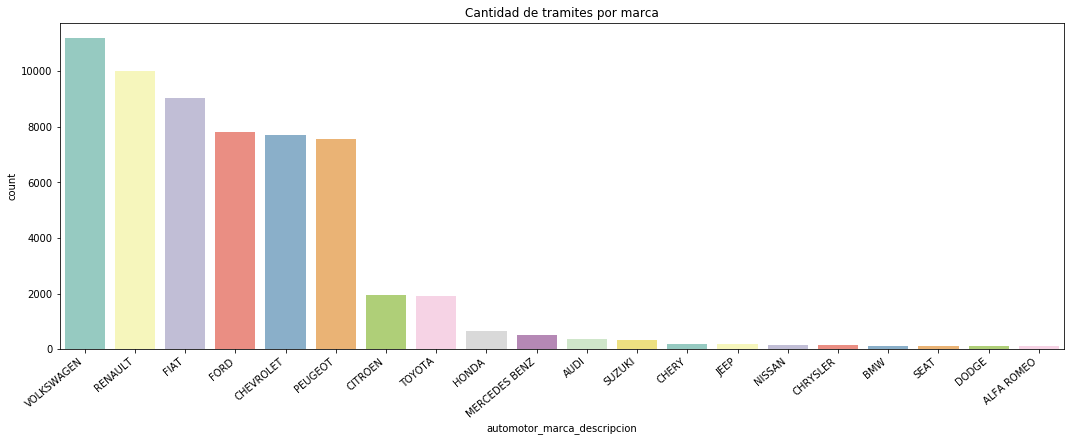

In [27]:
# Robos absolutos por marca

plt.figure(figsize = (18,6))
ax = sns.countplot(x = "automotor_marca_descripcion", 
                   data = robados_n_marcas, 
                   palette = "Set3",
                   order = robados_n_marcas["automotor_marca_descripcion"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de tramites por marca")
plt.show()

Uno de las limitaciones al interpretar estos datos es que si en el parque automotor hay mas VW que Seat es lógico esperar que haya mas robos de VW que de otra marca. En caso de que nosotroa quisiéramos tener algo parecido a la probabilidad de que nos roben un auto dada su marca, tendríamos que normalizar estos daos a la cantidad de autos de una determinada marca en el parque automotor de Argentina.

De momento en contamos con una fuente confiable de la cantidad de automobiles por marca en la argentina, pero esta nota periodistica (https://tn.com.ar/autos/lo-ultimo/parque-automotor-las-marcas-y-modelos-con-mas-presencia-en-las-calles-argentinas_873776) nos da una idea, aunque sea grosera, de la composición del parque automotor (fecha: 06/06/2018): "*El parque automotor de la Argentina está compuesto por 13.302.670 de vehículos. Y el 87 por ciento de esta cantidad está representado por apenas siete marcas: Volkswagen (16,5%), Renault (15,5%), Ford (13,5%), Fiat (13,5%), Chevrolet (12%), Peugeot (10%) y Toyota (5,3%)*". A continuación vamos a relativizar los datos previamente hallados al porcentaje del parque automotor por marca.

In [28]:
# Creamos un dataframe con las siete marcas mas vendidas en los index y el marketshare como dato
marcasTN = ['VOLKSWAGEN', 'RENAULT', 'FIAT', 'CHEVROLET', 'FORD', 'PEUGEOT', 'TOYOTA']
ShareTN  = {'share':[.165, .155, .135, .135, .12, .2, .053]}
marketShare_Marcas = pd.DataFrame(ShareTN, index = marcasTN)
marketShare_Marcas

,share
VOLKSWAGEN,0.165
RENAULT,0.155
FIAT,0.135
CHEVROLET,0.135
FORD,0.120
PEUGEOT,0.200
TOYOTA,0.053


In [29]:
# Ahora creo una tabla pivot con solo las siete marcas mas representadas
robadosTN = robados.loc[robados.automotor_marca_descripcion.isin(marcasTN)].groupby('automotor_marca_descripcion').tramite_tipo.agg('count')
robadosTN.head()

automotor_marca_descripcion
CHEVROLET     7706
FIAT          9047
FORD          7816
PEUGEOT       7569
RENAULT      10009
Name: tramite_tipo, dtype: int64

In [30]:
# Junto las dos cosas
robadosNorm = pd.concat([robadosTN, marketShare_Marcas], axis=1)
robadosNorm

,tramite_tipo,share
CHEVROLET,7706,0.135
FIAT,9047,0.135
FORD,7816,0.120
PEUGEOT,7569,0.200
RENAULT,10009,0.155
TOYOTA,1927,0.053
VOLKSWAGEN,11171,0.165


In [31]:
# Normalizo por el MarketShare
N_vehiculos = 13302670
robadosNorm['robosNorm'] = robadosNorm['tramite_tipo'] / (robadosNorm['share']*N_vehiculos)*100
robadosNorm = robadosNorm.sort_values(by=['robosNorm'], ascending = False)
robadosNorm

,tramite_tipo,share,robosNorm
VOLKSWAGEN,11171,0.165,0.508943
FIAT,9047,0.135,0.503770
FORD,7816,0.120,0.489626
RENAULT,10009,0.155,0.485423
CHEVROLET,7706,0.135,0.429098
PEUGEOT,7569,0.200,0.284492
TOYOTA,1927,0.053,0.273317


# Robos por año

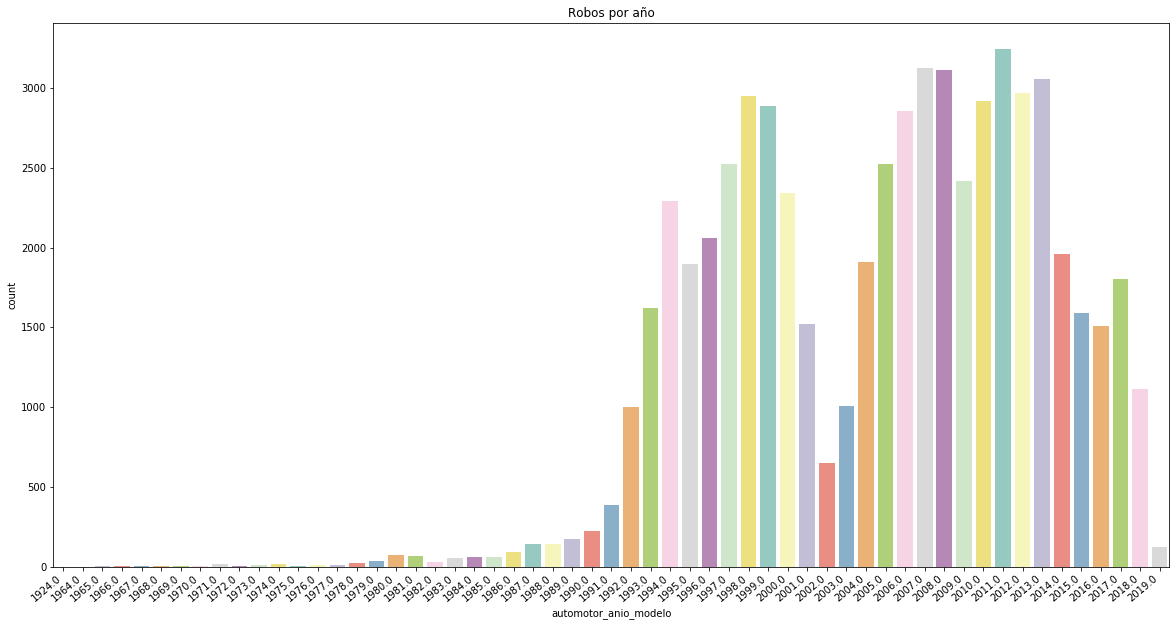

In [32]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="automotor_anio_modelo", data=robados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Robos por año")
plt.show()

### Robos por modelo

In [33]:
# Arreglo las marcas que están mal codificadas
np.shape(robados["automotor_modelo_descripcion"].unique())

(318,)

Acá la cosa se complica un poco más y que, como podemos ver, hay 8684 modelos distintos, muchos de esos repetidos con pequeñas variaciones (por ejemplo: XXX). 

En este caso tenemos como dato los 59 modelos con más patentamientos en los años 2018 y 2019 que, si bien no son directamente la composición del parque automotor, nos dan una idea grosera de la frecuencia relativa de cada uno de ellos. Por supuesto que este dato tiene claras limitaciones, por ejemplo, uno de los autos que más se encuentra en el parque automotor argentino es el Fiat Duna, sin embargo, no vamos a encontrar ninguna patentado en el período 2018-19.

Para poder combinar ambos datos vamos a acomodar los modelos del dataframe *robados* tratando de encontrar a estos 59 modelos.

### Robos por provincia

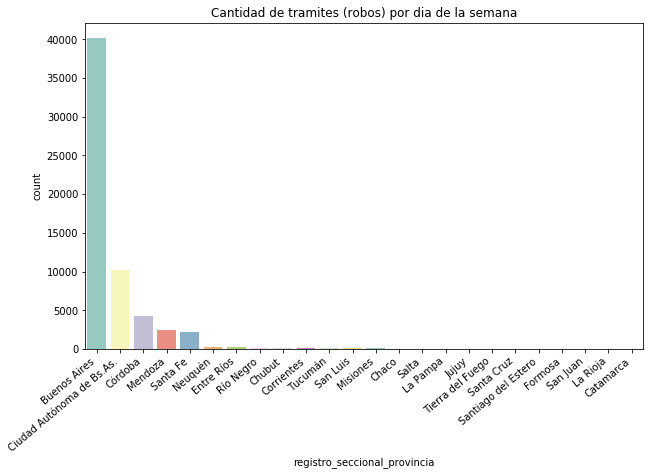

In [34]:
# Countplot de robos por provincia
plt.figure(figsize=(10,6))
ax = sns.countplot(x = "registro_seccional_provincia", 
                   data = robados, 
                   order = robados_n_marcas["registro_seccional_provincia"].value_counts().index,
                   palette = "Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de tramites (robos) por dia de la semana")
plt.show()

In [35]:
# Calculo los robos por provincia
robados_por_provincia = robados.groupby('registro_seccional_provincia').tramite_tipo.agg('count')

In [36]:
import geopandas as gpd
# El shapefile que tiene todas las provincias
shapefile = './GEO/provincia/provincia.shp'
# Lo leo usando Geopandas
provincias = gpd.read_file(shapefile)[['fna', 'nam', 'geometry']]
# Le cambio el nombre a "Tierra del Fuego, Antártida e Islas del Atlántico sur" por "Tierra del Fuego"
provincias.nam[16] = "Tierra del Fuego"
provincias.nam[0] = "Ciudad Autónoma de Bs.As."

In [37]:
# Junto el geopandas con los poligionos de las provincias con los robos por provincia
provincias = provincias.merge(robados_por_provincia, left_on='nam', right_index=True)

In [38]:
# El mapa me plotea la antartida y las islas asi que hago un rectangulo cortando solo el pais
shapefile = './GEO/AOI/AOI.shp'
# Read shapefile using Geopandas
AOI = gpd.read_file(shapefile)

In [39]:
# Construyo la intersección entre el rectángulo y el shapefile de las provincias
provincias_en_Argentina = gpd.overlay(provincias, AOI, how='intersection')
provincias_en_Argentina

,fna,nam,tramite_tipo,id,Class,geometry
0,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Bs.As.,10210,1,Argentina,POLYGON Z ((-58.34188739699994 -34.63109671699...
1,Provincia del Neuquén,Neuquén,237,1,Argentina,POLYGON Z ((-70.39345041599995 -36.15525721499...
2,Provincia de La Pampa,La Pampa,46,1,Argentina,(POLYGON Z ((-64.46428512299997 -35.0000522329...
3,Provincia de Mendoza,Mendoza,2450,1,Argentina,POLYGON Z ((-69.12569695099995 -32.00283498499...
4,Provincia de San Luis,San Luis,80,1,Argentina,POLYGON Z ((-67.05547011299996 -31.85605263599...
5,Provincia de Córdoba,Córdoba,4281,1,Argentina,POLYGON Z ((-63.87034900199995 -29.62387303499...
6,Provincia de Santa Fe,Santa Fe,2156,1,Argentina,POLYGON Z ((-60.27271410899993 -33.26386310199...
7,Provincia de Entre Ríos,Entre Ríos,202,1,Argentina,POLYGON Z ((-58.58137670599996 -30.16010098199...
8,Provincia de San Juan,San Juan,26,1,Argentina,POLYGON Z ((-69.62981019099993 -28.39369204999...
9,Provincia de La Rioja,La Rioja,19,1,Argentina,POLYGON Z ((-68.52082545399998 -27.81988008299...


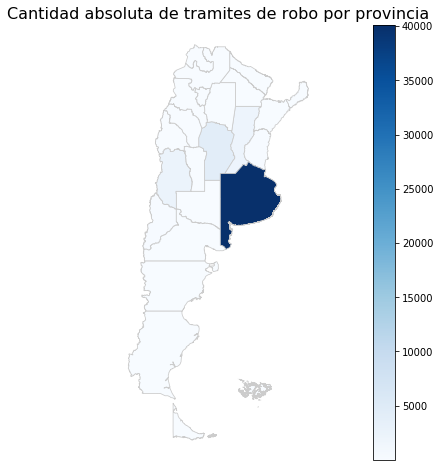

In [40]:
# Ploteo los robos absolutos por provincia

# Tamaño de la figura
fig, ax = plt.subplots(1, figsize=(20, 8))
# Título
ax.set_title('Cantidad absoluta de tramites de robo por provincia', fontdict={'fontsize': '16', 'fontweight' : '3'})
# Borro los ejes
ax.axis('off')

# Creo el colorbar
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(robados_por_provincia), vmax=max(robados_por_provincia)))
sm._A = []
cbar = fig.colorbar(sm)

# Plotea final
provincias_en_Argentina = provincias_en_Argentina.to_crs({'init': 'epsg:3395'}) # Lo paso a Mercator
provincias_en_Argentina.plot(column='tramite_tipo', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')


Ahora voy a normalizar primero por el número de patentados en 2018 y 2019 y después por el número de habitantes de las provincias. Mi sospecha es que algunas provincias están claramente subrepresentadas (puede ser porque no cargan las denuncias al sistema, porque el sistema integral no alcanza a todas las jurisdicciones o porque no se hacen todas las denuncias). El análisis por jurisdicción lo vamos a poder ver más en detalle en el sección **Robos por departamento**.

In [41]:
patentados_por_provincia = pd.read_csv('./accesorios/Patentamiento autos.csv', sep=';', encoding='latin-1')
patentados_por_provincia = patentados_por_provincia.rename(columns={"CABA": "Ciudad Autónoma de Bs.As."})
patentados_por_provincia = patentados_por_provincia.iloc[:,2:].sum(axis = 0)
patentados_por_provincia = pd.DataFrame(data = patentados_por_provincia.values, index = patentados_por_provincia.index, columns=['Patentados'])

In [42]:
provincias_en_Argentina = provincias_en_Argentina.merge(patentados_por_provincia, left_on='nam', right_index=True)
provincias_en_Argentina["Robos_norm"] = provincias_en_Argentina["tramite_tipo"]/provincias_en_Argentina["Patentados"]
provincias_en_Argentina

,fna,nam,tramite_tipo,id,Class,geometry,Patentados,Robos_norm
0,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Bs.As.,10210,1,Argentina,POLYGON Z ((-6494589.196952539 -4089578.798426...,162.032,63.012244
1,Provincia del Neuquén,Neuquén,237,1,Argentina,POLYGON Z ((-7836163.055490666 -4296795.442171...,879.655,0.269424
2,Provincia de La Pampa,La Pampa,46,1,Argentina,(POLYGON Z ((-7176131.394244757 -4139379.82854...,9403.461,0.004892
3,Provincia de Mendoza,Mendoza,2450,1,Argentina,POLYGON Z ((-7695037.385315457 -3741040.460175...,41.523,59.003444
4,Provincia de San Luis,San Luis,80,1,Argentina,POLYGON Z ((-7464580.787882729 -3721880.795366...,8183.521,0.009776
5,Provincia de Córdoba,Córdoba,4281,1,Argentina,POLYGON Z ((-7110014.727691304 -3434176.120188...,3751.839,1.141040
6,Provincia de Santa Fe,Santa Fe,2156,1,Argentina,POLYGON Z ((-6709527.843342428 -3906944.753171...,87.236,24.714567
7,Provincia de Entre Ríos,Entre Ríos,202,1,Argentina,POLYGON Z ((-6521249.024880853 -3502681.803222...,6039.878,0.033444
8,Provincia de San Juan,San Juan,26,1,Argentina,POLYGON Z ((-7751155.014494403 -3278386.469284...,9976.367,0.002606
9,Provincia de La Rioja,La Rioja,19,1,Argentina,POLYGON Z ((-7627703.398274056 -3206347.288756...,7717.000,0.002462


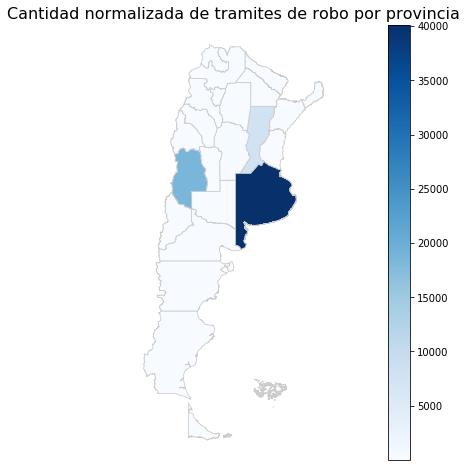

In [43]:
# Ploteo los robos absolutos por provincia

# Tamaño de la figura
fig, ax = plt.subplots(1, figsize=(20, 8))
# Título
ax.set_title('Cantidad normalizada de tramites de robo por provincia', fontdict={'fontsize': '16', 'fontweight' : '3'})
# Borro los ejes
ax.axis('off')

# Creo el colorbar
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(robados_por_provincia), vmax=max(robados_por_provincia)))
sm._A = []
cbar = fig.colorbar(sm)

# Plotea final
provincias_en_Argentina = provincias_en_Argentina.to_crs({'init': 'epsg:3395'}) # Lo paso a Mercator
provincias_en_Argentina.plot(column='Robos_norm', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

### recuperados

In [44]:
recuperados = pd.read_csv(r'C:\Users\Luciano\Trabajo final UTN\robo_autos\curados\recus_limpio.csv')

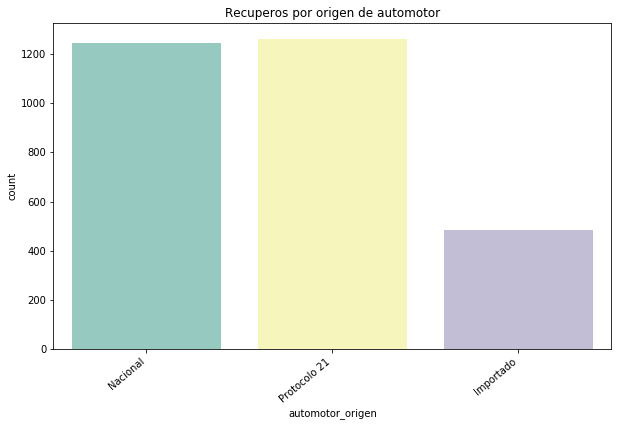

In [45]:
#Vemos la cantidad de autos recuperados en función del origen del mismo
plt.figure(figsize=(10,6))
ax = sns.countplot(x="automotor_origen", data=recuperados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Recuperos por origen de automotor")
plt.show()

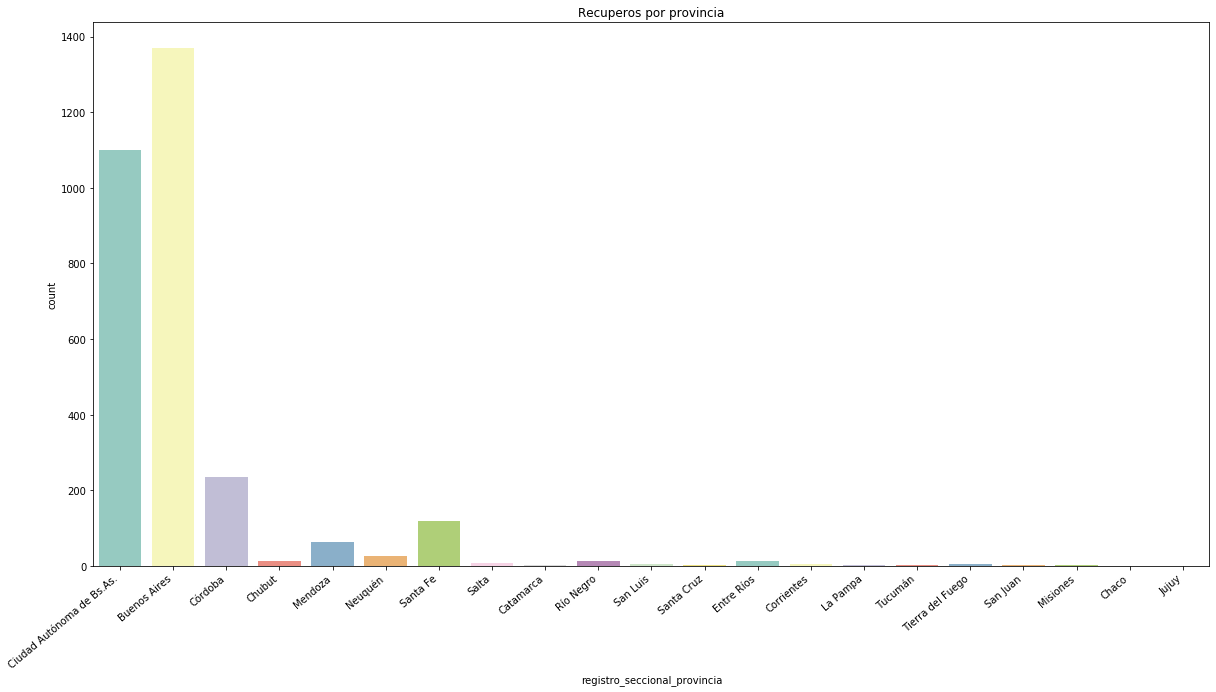

In [46]:
#Vemos recuperados por provincia
plt.figure(figsize=(20,10))
ax = sns.countplot(x="registro_seccional_provincia", data=recuperados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Recuperos por provincia")
plt.show()

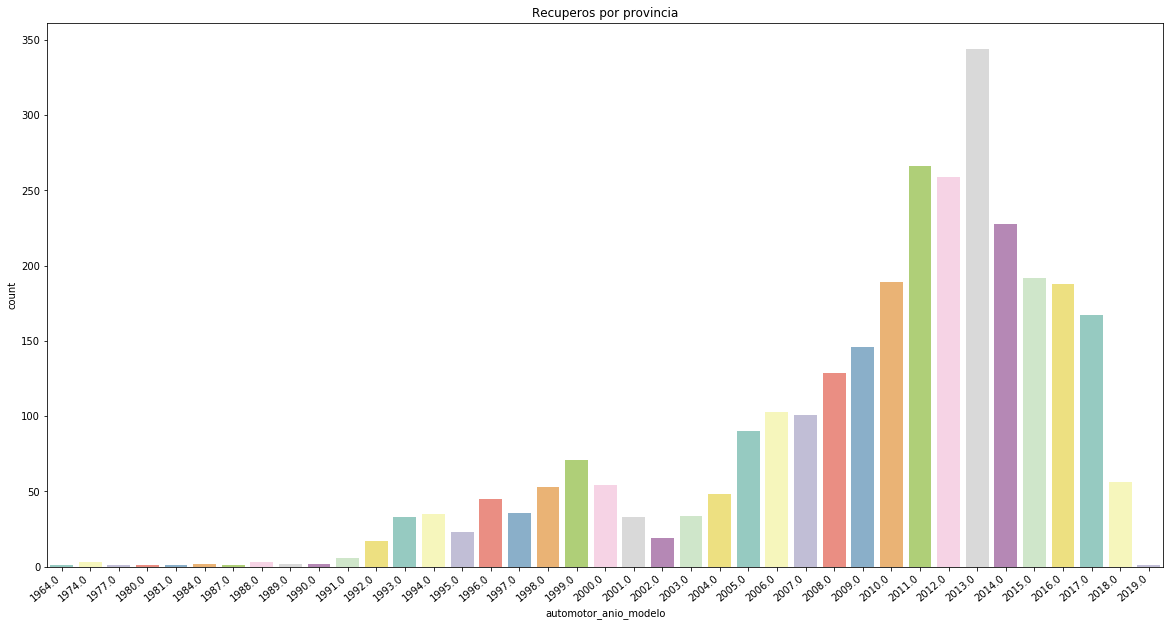

In [47]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="automotor_anio_modelo", data=recuperados, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Recuperos por provincia")
plt.show()

In [48]:
#Vamos a comparar los recuperados por anio de modelo en relación a lso robados totales de ese anio de modelo
robados_anio_count = robados['automotor_anio_modelo'].value_counts()
recuperados_anio_count = recuperados['automotor_anio_modelo'].value_counts()

In [49]:
robados_anio_count = pd.DataFrame(robados_anio_count)
recuperados_anio_count = pd.DataFrame(recuperados_anio_count)

In [50]:
robados_anio_count.columns = ['total_robados_anio_modelo']
robados_anio_count.columns

Index(['total_robados_anio_modelo'], dtype='object')

In [51]:
recuperados_anio_count.columns = ['total_recuperados_anio_modelo']
recuperados_anio_count.columns

Index(['total_recuperados_anio_modelo'], dtype='object')

In [52]:
robos_recuperos_anio_modelo = pd.merge(robados_anio_count, recuperados_anio_count, left_index=True, right_index=True, how='outer')

In [53]:
robos_recuperos_anio_modelo.fillna(0, inplace=True)

In [54]:
robos_recuperos_anio_modelo['anio_modelo'] = robos_recuperos_anio_modelo.index
#tiramos el index viejo, metemos uno nuevo y el viejo lo igualamos a una columna que inventamos
robos_recuperos_anio_modelo = robos_recuperos_anio_modelo.reset_index(drop=True)

In [55]:
robos_recuperos_anio_modelo = robos_recuperos_anio_modelo.iloc[1:]

In [56]:
robos_recuperos_anio_modelo['recuperados_relativo_robo'] = robos_recuperos_anio_modelo['total_recuperados_anio_modelo'] / robos_recuperos_anio_modelo['total_robados_anio_modelo']

In [57]:
robos_recuperos_anio_modelo.columns

Index(['total_robados_anio_modelo', 'total_recuperados_anio_modelo',
       'anio_modelo', 'recuperados_relativo_robo'],
      dtype='object')

In [58]:
anio_modelo_list = list(robos_recuperos_anio_modelo['anio_modelo'])
recuperados_relativo_robo_list = list(robos_recuperos_anio_modelo['recuperados_relativo_robo'])
tasa_sobre_robo = list(robos_recuperos_anio_modelo['recuperados_relativo_robo']/robos_recuperos_anio_modelo['total_robados_anio_modelo'])
tasa_por_robo = list(1/(robos_recuperos_anio_modelo['recuperados_relativo_robo']/robos_recuperos_anio_modelo['total_robados_anio_modelo']))

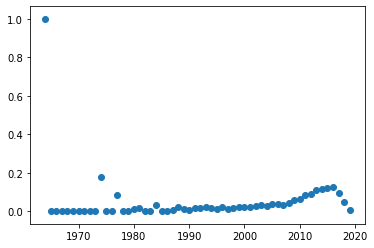

In [59]:
#Vemos la tasa de recupero por año de modelo del auto
plt.scatter(anio_modelo_list,recuperados_relativo_robo_list)
plt.show()

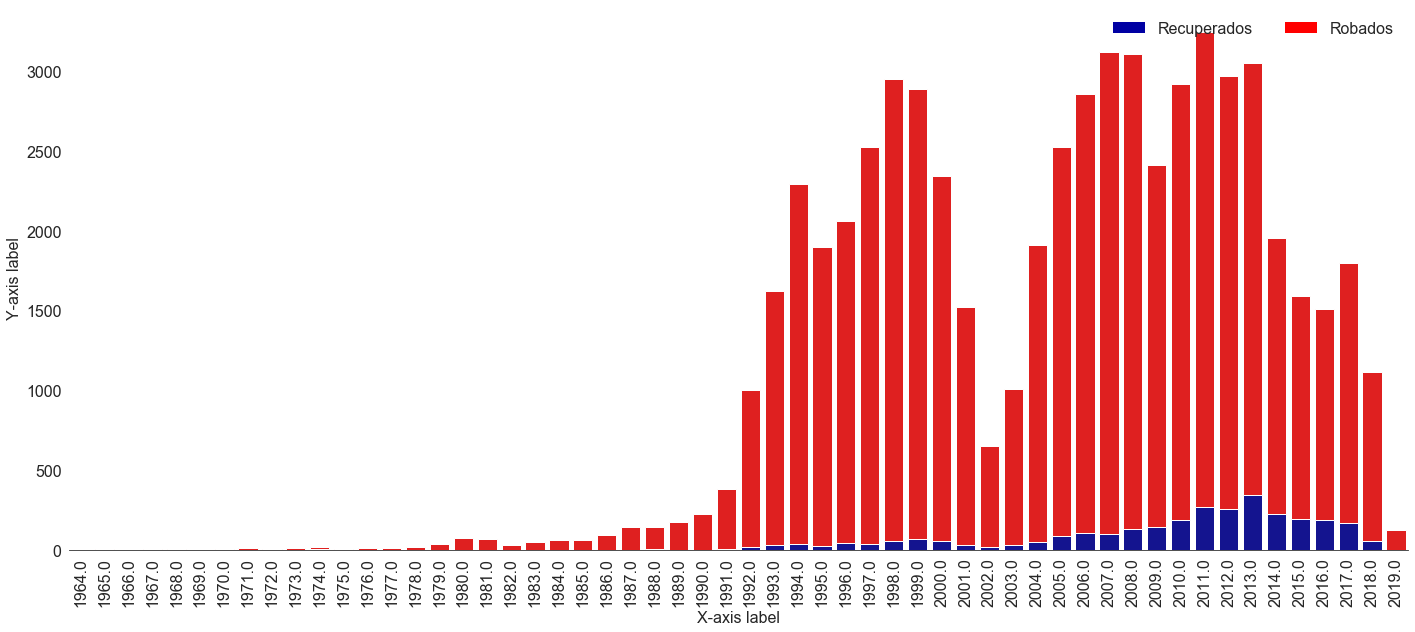

In [60]:
#Vemos cuanto se recupero en relación al robo de cada año de modelo de auto.

sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = robos_recuperos_anio_modelo.anio_modelo, y = robos_recuperos_anio_modelo.total_robados_anio_modelo, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = robos_recuperos_anio_modelo.anio_modelo, y = robos_recuperos_anio_modelo.total_recuperados_anio_modelo, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Recuperados', 'Robados'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
plt.xticks(rotation=90)
sns.despine(left=True) 
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

In [69]:
autos_circulantes_1819.to_csv('autos_circulantes_1819.csv')

NameError: name 'autos_circulantes_1819' is not defined

In [154]:
autos_circulantes_1819 = pd.read_csv(r'.\robo_autos\autos_circulantes_1819.csv')

FileNotFoundError: [Errno 2] File b'.\\robo_autos\\autos_circulantes_1819.csv' does not exist: b'.\\robo_autos\\autos_circulantes_1819.csv'

In [150]:
autos_circulantes_1819 = autos_circulantes_1819.drop(['Unnamed: 0'], axis=1)

In [ ]:
#Vemos cuanto se recupero en relación al robo de cada año de modelo de auto.

sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x =  y = robos_recuperos_anio_modelo.total_robados_anio_modelo, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = robos_recuperos_anio_modelo.anio_modelo, y = robos_recuperos_anio_modelo.total_recuperados_anio_modelo, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Recuperados', 'Robados'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
plt.xticks(rotation=90)
sns.despine(left=True) 
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

In [151]:
autos_circulantes_1819.iloc[24:]

,provincia,Ene 2018,Feb 2018,Mar 2018,Abr 2018,May 2018,Jun 2018,Jul 2018,Ago 2018,Sep 2018,Oct 2018,Nov 2018,Dic 2018,Ene 2019,Feb 2019,Mar 2019,Abr 2019,May 2019,Jun 2019,Jul 2019,Ago 2019,Sep 2019,Oct 2019,Nov 2019,Dic 2019
24,TOTAL,15367777,15444629,15524672,15597001,15675004,15732545,15807006,15865376,15911770,15953891,15987106,16010642,16065648,16083174,16122449,16163453,16193186,16223558,16267613,16304424,16334125,16360196,0,0


In [134]:
def divisor (x):
    for x in r:
        float(x) / 100000
    return x

In [153]:
autos_circulantes_1819 = autos_circulantes_1819.iloc[24:].apply(lambda x: divisor(x))